# Analisar dados de filmes - IMDb #
## Objetivo - Realizar uma análise (básica) dos dados de filmes catalogados na base de dados do IMDb. 
 
  ###  Será analisado somente "Movies" (Dica: use como filtro)    
___ 
    
###       Algumas observações 
 
####       A tabela ratings informa: 
       
####       averageRating – weighted average of all the individual user ratings
####       numVotes - number of votes the title has received
       
####       Como comparar  
####                      Filme A -> 9 votos e classificação média = 8.5 
####                      Filme B -> 100 votos e classificação média = 7.4 

Download da base de dados do kaggle

In [1]:
#!pip install kaggle
#!pip install opendatasets

In [2]:
import kaggle
import opendatasets as od

In [3]:
od.download ("https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

 leilafabiolaferreira


Your Kaggle Key: 

 ································


  0%|          | 0.00/82.3M [00:00<?, ?B/s]

100%|██████████| 82.3M/82.3M [00:04<00:00, 20.1MB/s]


Importando bibliotecas a serem utilizadas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Carregando os dados 

In [6]:
df = pd.read_csv('IMDb movies.csv')

C:\Users\leila\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [8]:
df.head(3)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0


In [9]:
df[df.duplicated()] #verificando duplicidades

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics


Para verificar os maiores ratings a partir do ano 2000, é necessário tratar os dados da coluna year. Tentando manipular essa coluna sem tratamento, verifica-se que possui uma string na linha 83917:

*ValueError: Unable to parse string "TV Movie 2019" at position 83917

In [10]:
df.drop(df.loc[df['year']=="TV Movie 2019"].index, inplace=True) 
#dropando a linha com a string "TV Movie 2019"

In [11]:
df['year'] = df['year'].astype('int64') 
#type casting object->int64

In [12]:
df.drop(['country', 'language', 'writer', 'production_company', 'description','budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'], axis='columns', inplace=True) #dropando colunas que não serão utilizadas nas análises

In [13]:
df.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'director', 'actors', 'avg_vote', 'votes'],
      dtype='object')

#### 	1.1 ) Quais os filmes com maiores ratings a partir do ano 2000 - salvar em um csv os  1000 mais bem “rankeados”.

In [14]:
#selecionando filmes a partir de 2000
df = df[df['year'] >= 2000] 
 #ordenando pelo avg_vote
df = df.sort_values(by='avg_vote', ascending = False)

In [15]:
#selecionando os 1000 filmes mais bem rankeados
df = df.iloc[0:1000,0:]
#resetando o índice
df.reset_index(drop=True,inplace=True)

In [16]:
df.tail(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,director,actors,avg_vote,votes
999,tt8490894,Ee Nagaraniki Emaindi,Ee Nagaraniki Emaindi,2018,2018-06-29,"Comedy, Drama",122,Tharun Bhascker Dhaassyam,"Vishwak Sen, Sushanth Reddy, Abhinav Gomatam, ...",7.9,1603


In [17]:
#salvando em um novo arquivo csv
df.to_csv('top_film.csv')

#### 	1.2)  Quais os diretores dos filmes em 1.1 ? 
####         (Print na tela, ou graficamente)

In [18]:
top_film = pd.read_csv('top_film.csv')

In [19]:
#este comando gera uma lista muito extensa
top_film.director.unique()

array(['Msn Surya', 'Abner Official', 'Aalmist Subba', 'Sampath Rudra',
       'Basheed S.K.', 'Valerio Zanoli', 'Trinadh Velisila', 'Manoj Nair',
       'Don Tjernagel', 'Jose Thomas', 'Danny Patrick', 'Anthony Bawn',
       'Daniel Keith, Snorri Sturluson', 'Anil Thota', 'Sergey A.',
       'Raakesh Baala', 'Balavalli Darshith Bhat', 'Derek Ahonen',
       'Sam Mendes', 'Shekhar S. Jha', 'Amith', 'Arsel Arumugam',
       'Mahesh Manjrekar', 'Nagaraja Uppunda', 'Amitabh Reza Chowdhury',
       'Raghav Peri', 'Ray Nayoan', 'Antoneta Kastrati',
       'Marianne Elliott', nan,
       'Chathra Weeraman, Bharatha Hettiarachchi', 'Maha Venkatesh',
       'Tauquir Ahmed', 'A.K.S. Nambiar', 'Yukio Kaizawa',
       'Marc-André Lavoie', 'Ram, Amudhavan Karuppiah',
       'Nikoloz Khomasuridze', 'Peter Sundardas', 'Christopher Nolan',
       'Sameer Vidwans', 'Dito Tsintsadze', 'Colonelu Morteni',
       'Manju Mandavya', 'Florian Frerichs', 'Tim Carroll', 'Yaël Farber',
       'Peter Jackson', 

In [20]:
#selecionando 10 diretores mais bem avaliados
top_10_director = top_film[['director','avg_vote']].head(10)

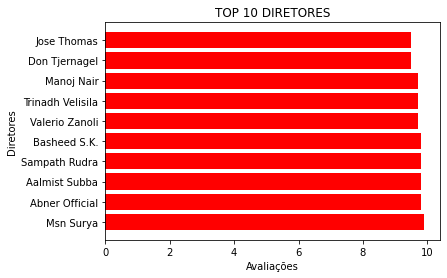

In [21]:
#plot dos top 10 diretores de acordo com a média dos votos
plot_barh = plt.barh(top_10_director['director'], top_10_director['avg_vote'], color = 'r')
plt.title('TOP 10 DIRETORES')
plt.xlabel('Avaliações')
plt.ylabel('Diretores')
plt.show()

#### 	1.3) Quais os atores principais dos filmes em 1.1)  
####         (Print na tela, ou graficamente)


In [22]:
atores = top_film[['avg_vote','director','actors']].dropna()
atores['actors'] = top_film['actors'].str.split(',')

atores.reset_index(inplace=True, drop=True)
atores.actors.head(1)

0    [Shamna Kasim,  Sakshi Chaudhary,  Jaya Prada,...
Name: actors, dtype: object

In [23]:
#Selecionando o primeiro ator da lista de atores
A = atores['actors'].values

for i in range(len(A)):
    atores['actors'][i] = A[i][0]

atores.head(1)

<ipython-input-23-10f4d2354bf1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atores['actors'][i] = A[i][0]


,avg_vote,director,actors
0,9.9,Msn Surya,Shamna Kasim


In [24]:
#este comando gera uma lista muito extensa
atores.actors.unique()

array(['Shamna Kasim', 'Angibell', 'Prashant Baraili', 'Bishnu Adhikari',
       'Mumait Khan', 'Walter Nudo', 'Abhinay', 'Siju Wilson',
       'Matt Anderson', 'Kishore Satya', 'Connor Barr', 'Ron Moody',
       'Andre Myers', 'Daniel Keith', 'Mahesh Achanta', 'Sergey A.',
       'Abhirami', 'Ravi Bhat', 'Rob Franco', 'Simon Russell Beale',
       'Priyanshu Chatterjee', 'Amith', 'Shanthi Anand', 'Nana Patekar',
       'Githanjali', 'Chanchal Chowdhury', 'James Robinson Jr.',
       'Putri Marino', 'Adriana Matoshi', 'Andrew Garfield',
       'Uddika Premarathna', 'Radha Bessy', 'Shahiduzzaman Selim',
       'Sheikh Rasheed', 'Dorothée Berryman', 'Mammootty',
       'Rezo Chkhikvishvili', 'Hemanth Menon', 'Christian Bale',
       'Bhagyashree Milind', 'Goga Pipinashvili', 'Colonelu Morteni',
       'Chikkanna', 'Bruno Eyron', 'Samuel Barnett', 'Richard Armitage',
       'Kim Kold', 'Noel Appleby', 'Michael Crowley', 'Tahlia Jade Holt',
       'Lal', 'David Kamkamidze', 'Donavon Warren

In [25]:
top_10_actor = atores[['actors','avg_vote']].head(10)

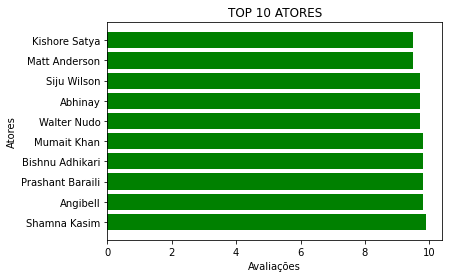

In [26]:
#plot dos top 10 atores de acordo com a média dos votos
plot_barh = plt.barh(top_10_actor['actors'], top_10_actor['avg_vote'], color = 'g')
plt.title('TOP 10 ATORES')
plt.xlabel('Avaliações')
plt.ylabel('Atores')
plt.show()

#### 	1.4)  Listar a intersecção dos filmes obtidos em 1.2 e 1.3 - 
####    (Para encontrar um perfil de combinação diretores + atores = sucesso do filme) 

O dataframe gerado já possui as informações associadas entre diretores e atores dos filmes mais bem rankeados 

In [27]:
top_film[['director', 'actors']].head()

,director,actors
0,Msn Surya,"Shamna Kasim, Sakshi Chaudhary, Jaya Prada, Av..."
1,Abner Official,"Angibell, Gabriel Buitrago, Darwing, Dariana J..."
2,Aalmist Subba,"Prashant Baraili, Davina, Pranisha Gahatraj, P..."
3,Sampath Rudra,"Bishnu Adhikari, Himanshi Khurana, Aparna Shar..."
4,Basheed S.K.,"Mumait Khan, Manisha Koirala, Arjun Sarja"


Porém se essas informações estivessem em datasets diferente, poderia ser feita a intersecção conforme exemplo abaixo:

In [28]:
#df1 = df1[['columnID', 'columnA']]
#df2 = df2[['columnID', 'columnB']]
#intersection = df1.merge(df2 , on = 'columnID')

###   Desafio: 
    
####    1.5) Faça as análises anteriores considerando alguns gêneros de filmes (Drama,Ação etc) 

In [29]:
#obtendo gêneros mais comuns no dataset
genero = top_film['genre'].value_counts() 

In [30]:
genero = pd.DataFrame(genero)

In [31]:
genero.reset_index(inplace=True)

In [32]:
genero.columns = ['genre', 'count']

In [33]:
genero.head(3)

,genre,count
0,Drama,194
1,"Comedy, Drama",48
2,"Drama, Romance",36


Cinco gêneros mais comuns no dataset

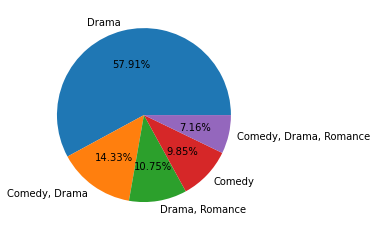

In [34]:
pie_chart = plt.pie(genero['count'][0:5], 
                    labels=genero['genre'][0:5], autopct='%.2f%%')

####    1.6) Proponha uma ponderação que leve em conta n. de votos recebidos por um filme 

In [35]:
top_film.votes.max()

2241615

In [36]:
top_film.votes.min()

100

In [42]:
bins = np.linspace(min(df["votes"]), max(df["votes"]), 4)
labels = ['pouco votado', 'mediano', 'muito votado']
top_film['binned'] = pd.cut(top_film['votes'], bins=bins, labels=labels)

In [59]:
import numpy as np
a = np.array(top_film["binned"].value_counts())
a

array([956,  36,   4], dtype=int64)

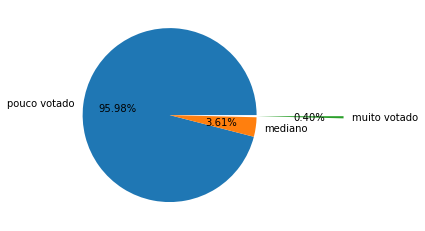

In [66]:
import matplotlib.pyplot as plt
explode_slices = [ 0, 0, 1] 
pie_chart = plt.pie(a, labels=labels, explode = explode_slices, autopct='%.2f%%')

In [43]:
binned = top_film.groupby(by=['binned'])['title'].apply(list)

In [44]:
binned['pouco votado'][0:10]

['Suvarna Sundari',
 'Lejos de Casa pelicula Venezolana',
 'Jeeudo',
 'Ek',
 'Notuku Potu',
 'Hopeful Notes',
 'Meka Suri',
 'Vaarthakal Ithuvare',
 'The Moving on Phase',
 'Isha']

In [45]:
binned['mediano'][0:10]

['Il Signore degli Anelli - Le due torri',
 'Interstellar',
 'Il gladiatore',
 'The Prestige',
 'The Departed - Il bene e il male',
 'Joker',
 'Avengers: Infinity War',
 'Avengers: Endgame',
 'WALL·E',
 'Memento']

In [46]:
binned['muito votado'][0:10]

['Il cavaliere oscuro',
 'Il Signore degli Anelli - Il ritorno del re',
 'Inception',
 "Il Signore degli Anelli - La compagnia dell'Anello"]